# Team 2 - Google Play Store

![](https://www.brandnol.com/wp-content/uploads/2019/04/Google-Play-Store-Search.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/lava18/google-play-store-apps)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- There are lots of null values. How should we handle them?
- Column `Installs` and `Size` have some strange values. Can you identify them?
- Values in `Size` column are currently in different format: `M`, `k`. And how about the value `Varies with device`?
- `Price` column is not in the right data type
- And more...


# Import library and Load dataset 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link_dataset = 'https://drive.google.com/open?id=1c_yQ7RmMeha0y4tyVa8W3VSvWW3ed4dQ'

In [5]:
_, id_csv = link_dataset.split("=")

id_csv

'1c_yQ7RmMeha0y4tyVa8W3VSvWW3ed4dQ'

In [0]:
downloaded = drive.CreateFile({'id':id_csv}) 
downloaded.GetContentFile('google_play_store.csv')  
# import dataset to Pandas DataFrame

GPlay_Store = pd.read_csv('google_play_store.csv')

In [7]:
GPlay_Store.head() # check DataFrame

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Summary of Dataset

In [8]:
GPlay_Store.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
GPlay_Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
GPlay_Store.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Pre-processing dataset

In [53]:
#There are some duplicated rows
GPlay_Store.drop_duplicates(inplace = True)
GPlay_Store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 11 columns):
App               10357 non-null object
Category          10357 non-null object
Rating            8892 non-null float64
Reviews           10357 non-null int64
Size              10357 non-null object
Installs          10357 non-null int64
Price             10357 non-null float64
Content Rating    10357 non-null object
Last Updated      10357 non-null object
Current Ver       10349 non-null object
Android Ver       10355 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 971.0+ KB


In [0]:
# Standardlize type of Price
GPlay_Store['Price'] = GPlay_Store['Price'].apply(lambda x : x[1:] if x[0] == '$' else (x if x[0].isdigit() else 0)).astype('float')

In [0]:
# Columns "Type" do not give any informations => drop it
GPlay_Store.drop(columns='Type', inplace = True)

# Columns "Genres" do not give any informations => drop it
GPlay_Store.drop(columns='Genres', inplace = True)

In [0]:
# There is a outlier in 'Rating', which has rating point 19
GPlay_Store.drop(labels = GPlay_Store[GPlay_Store['Rating'] == 19].index, inplace = True)

In [0]:
# Standardlize type of 'Reviews'
GPlay_Store['Reviews'] = GPlay_Store['Reviews'].astype(int)

In [0]:
# Standardlize type of 'Installs'
# Assume 5000+ = 5000

GPlay_Store['Installs'] = GPlay_Store['Installs'].apply(lambda x: ('0' + x)[:-1].replace(',', '')).astype(int)

In [49]:
GPlay_Store['Last Updated'].str[-4:].unique()

array(['2018', '2017', '2014', '2016', '2015', '2013', '2012', '2011',
       '2010'], dtype=object)

# Visualizing and Explore dataset

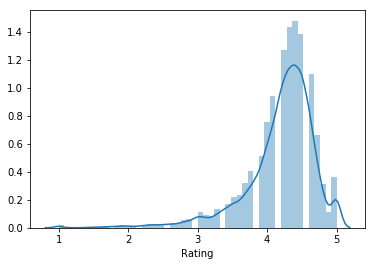

In [16]:
# Distribution of Rating 
sns.distplot(GPlay_Store['Rating'].dropna())

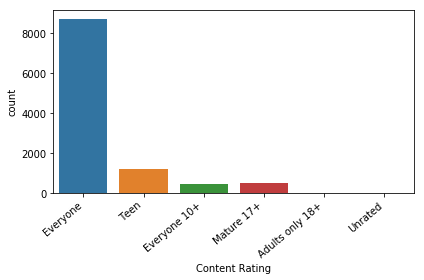

In [17]:
# Count number of apps which is seperated by 'Content Rating'
num_ContentRating = sns.countplot(x = 'Content Rating', data = GPlay_Store)
num_ContentRating.set_xticklabels(num_ContentRating.get_xticklabels(), rotation=40, ha="right", fontsize = 10)
plt.tight_layout()
plt.show()

# Almost apps is designed for everyone to use

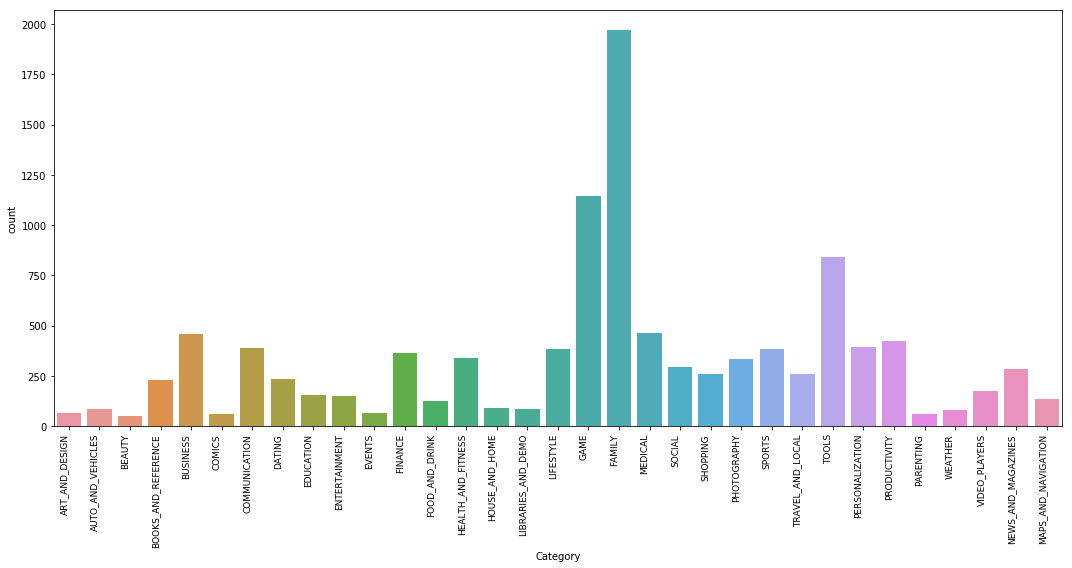

In [18]:
plt.figure(figsize=(15, 8))
num_AppsCategory = sns.countplot(x = 'Category' , data = GPlay_Store )
num_AppsCategory.set_xticklabels(num_AppsCategory.get_xticklabels(), rotation=90, ha="right", fontsize = 9)
plt.tight_layout()
plt.show()

# Game and Family category have a lots of apps 

In [20]:
GPlay_Store_corr = GPlay_Store.corr()
GPlay_Store_corr

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068141,0.051355,-0.021903
Reviews,0.068141,1.000000,0.643122,-0.009667
Installs,0.051355,0.643122,1.000000,-0.011689
Price,-0.021903,-0.009667,-0.011689,1.000000


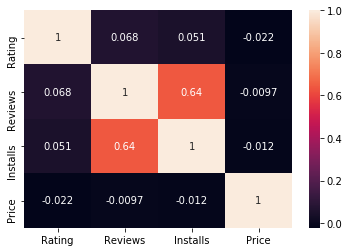

In [22]:
# Heatmap for Correlation
sns.heatmap(data = GPlay_Store_corr, annot = True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


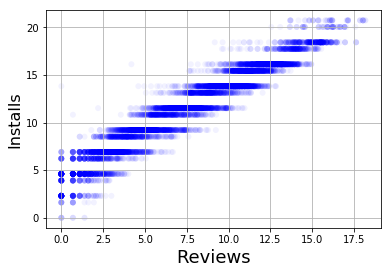

In [31]:
# Look at the heatmap, Installs and Reviews are possitive correlation 
# => scatter plot
# log transformation
x = np.log(GPlay_Store['Reviews'])
y = np.log(GPlay_Store['Installs'])

plt.scatter(x, y, c='blue', alpha=0.05, edgecolors='none')
plt.xlabel('Reviews', fontsize=18)
plt.ylabel('Installs', fontsize=16)
plt.grid(True)

plt.show()

<Figure size 3600x3600 with 0 Axes>

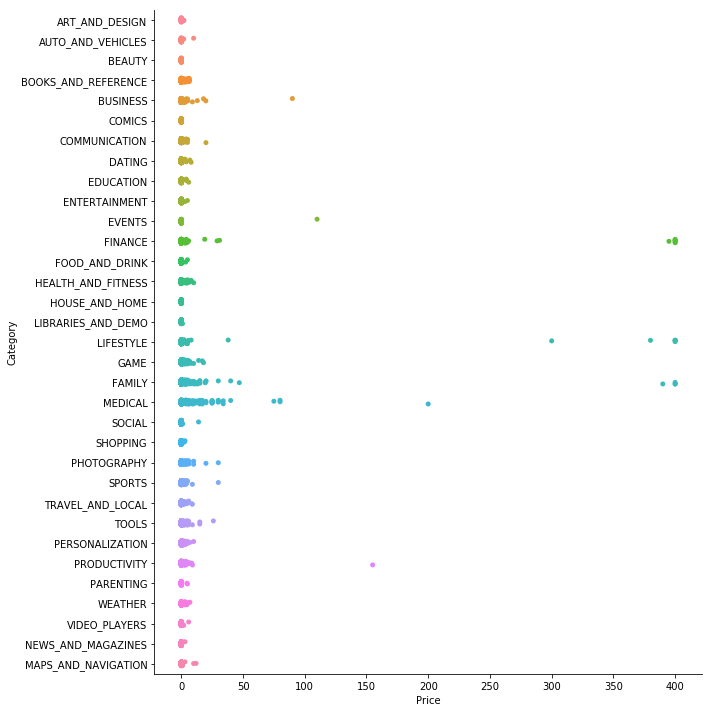

In [41]:
plt.figure(figsize=(50,50))
sns.catplot(x="Price", y="Category", data=GPlay_Store, height = 10);

In [54]:
# Almost apps are in 0 - 50$
# There some apps over 250$ - too expensive => find them, maybe they have interesting thing 
GPlay_Store[GPlay_Store['Price'] > 250]

# Their names are same format ^^~

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.5M,100,399.99,Everyone,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,399.99,Everyone,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,400.00,Everyone,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,399.99,Everyone,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,399.99,Everyone,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,299.99,Everyone,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,399.99,Everyone,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,379.99,Everyone,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22M,1000,399.99,Everyone,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965k,5000,399.99,Everyone,"May 1, 2017",3.4,4.4 and up


In [0]:
GPlay_Store['Last_Update_Year'] = GPlay_Store['Last Updated'].str[-4:]

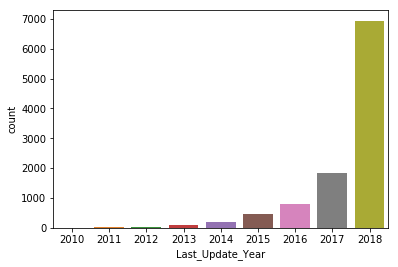

In [58]:
sns.countplot(x = 'Last_Update_Year', data = GPlay_Store)

## Export dataframe to CSV and Import to google data studio

In [59]:
!pwd

/content


In [0]:
GPlay_Store.to_csv('/content/GPlay_Store.csv', index = False, header = True )